In [33]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt 
from tensorflow.keras import utils

import pandas as pd

import time
from tqdm import tqdm

%matplotlib inline 

In [2]:
# MNIST Daten laden
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Überprüfung der Dimensionen
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
img_num = 25 
X_train[img_num]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83,
         91, 143, 255, 190,  91,  50,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  49, 180, 246,
        253, 253, 253, 253, 253, 220, 154,  17,   3,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[img_num]

2

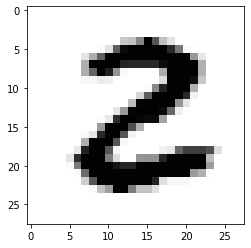

In [6]:
plt.imshow(X_train[img_num], cmap='Greys') 
plt.show() 

In [7]:
# bildformat von 28x28 auf 784x1 ändern (Dense Layer arbeitet mit Vectors)
X_train_vec = X_train.reshape(60000, 784)
X_test_vec = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_train_vec.shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# Normalisierung der Bilder
X_train_vec = X_train_vec.astype('float32')
X_train_vec = X_train_vec / 255
X_test_vec = X_test_vec.astype('float32')
X_test_vec = X_test_vec / 255

In [9]:
X_train_vec[img_num]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
y_train[img_num]

2

In [11]:
utils.to_categorical(y_train[img_num], 10)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# Antworten in das Format one_hot_encoding umwandeln
y_train_vec = utils.to_categorical(y_train, 10)
y_test_vec = utils.to_categorical(y_test, 10)

In [13]:
print(y_train_vec.shape)

(60000, 10)


## Erstellen eines neuronalen Netzwerks

In [14]:
model = Sequential()
model.add(Dense(100, input_dim = 784, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# model.get_weights()

In [17]:
# Training des neuronalen Netzwerks
history = model.fit(X_train_vec, y_train_vec, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8879 - val_loss: 0.1904 - val_accuracy: 0.9453
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9507 - val_loss: 0.1382 - val_accuracy: 0.9603
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9652 - val_loss: 0.1275 - val_accuracy: 0.9629
Epoch 4/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9735 - val_loss: 0.1141 - val_accuracy: 0.9661
Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.1006 - val_accuracy: 0.9701
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 0.0973 - val_accuracy: 0.9707
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 

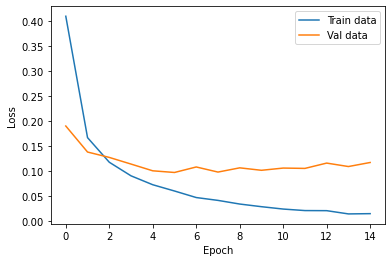

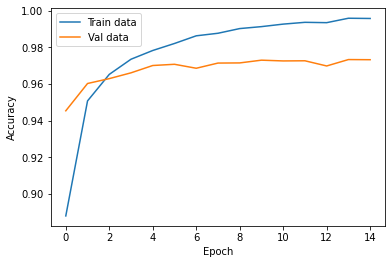

In [18]:
# Die Lernkurven grafisch darstellen (loss)
plt.plot(history.history['loss'], label='Train data')
plt.plot(history.history['val_loss'], label='Val data')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Die Lernkurven grafisch darstellen (accuracy)
plt.plot(history.history['accuracy'], label='Train data')
plt.plot(history.history['val_accuracy'], label='Val data')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [19]:
model.save_weights('model.h5')
# model.load_weights('model.h5')

## Experimente mit neuronalen Netzwerkeinstellungen

In [46]:
def log_results(neuron_num, akt_func, batch_size, loss, acc, run_time):
    return {'neuron_num': neuron_num, 'aktivation_func':akt_func,  'batch_size':batch_size, 
                 'loss' : round(loss, 3), 'acc': round(acc, 3), 'exec_time': round(run_time, 3) }

In [38]:
results = []

In [39]:
start_time = time.time()

model = Sequential() 
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [40]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model.fit(X_train_vec, y_train_vec, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.2765 - accuracy: 0.9211 - val_loss: 0.1460 - val_accuracy: 0.9582
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1106 - accuracy: 0.9674 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0699 - accuracy: 0.9799 - val_loss: 0.0885 - val_accuracy: 0.9730
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0794 - val_accuracy: 0.9758
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.0792 - val_accuracy: 0.9775
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 7/15
375/375 [==============================] - 3s 8ms/step - loss: 0.0174 - accuracy: 0.9957 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 

In [42]:
res = model.evaluate(X_test_vec, y_test_vec)

end_time = time.time()

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9798


In [47]:
results.append(log_results(800, 'relu', 128, res[0], res[1], end_time - start_time))
results

[{'neuron_num': 800,
  'aktivation_func': 'relu',
  'batch_size': 128,
  'loss': 0.08,
  'acc': 0.98,
  'exec_time': 43.445}]

### Aufgabe 1

Ändern Sie die Anzahl der Neuronen im Netz mit den folgenden Werten:<br><br>
    ○ eine Schicht 10 Neuronen<br>
    ○ eine Schicht 100 Neuronen<br>
    ○ eine Schicht 5000 Neuronen<br>

In [49]:
neuron_num = [10, 100, 5000]

for n in tqdm(neuron_num):
    start_time = time.time()
    model = Sequential() 
    model.add(Dense(n, input_dim=784, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    model.fit(X_train_vec, y_train_vec, batch_size=128, epochs=15, verbose=0, validation_split=0.2)
    
    res = model.evaluate(X_test_vec, y_test_vec)
    
    end_time = time.time()
    
    results.append(log_results(n, 'relu', 128, res[0], res[1], end_time - start_time))
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

313/313 [==============================] - 0s 793us/step - loss: 0.2432 - accuracy: 0.9315


 33%|███▎      | 1/3 [00:07<00:14,  7.20s/it]

313/313 [==============================] - 0s 849us/step - loss: 0.0789 - accuracy: 0.9781


 67%|██████▋   | 2/3 [00:15<00:08,  8.11s/it]

313/313 [==============================] - 1s 4ms/step - loss: 0.0794 - accuracy: 0.9834


100%|██████████| 3/3 [02:56<00:00, 58.71s/it]


In [52]:
print(len(results))

4


### Aufgabe 2

Ändern Sie die Aktivierungsfunktion in den versteckten Schichten von relu auf linear.

In [53]:
start_time = time.time()
    
model = Sequential() 
model.add(Dense(800, input_dim=784, activation="linear"))
model.add(Dense(10, activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
model.fit(X_train_vec, y_train_vec, batch_size=128, epochs=15, verbose=0, validation_split=0.2)
    
res = model.evaluate(X_test_vec, y_test_vec)
    
end_time = time.time()
    
results.append(log_results(800, 'linear', 128, res[0], res[1], end_time - start_time))

313/313 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.9243


In [54]:
print(len(results))

5


### Aufgbe 3

Ändern Sie die batch_size:<br><br>
    ○ 1<br>
    ○ 10<br>
    ○ 100<br>
    ○ Alle Basis (60000)

In [55]:
batch_sizes = [1, 10, 100, 60000]

for b_s in batch_sizes:
    start_time = time.time()
    model = Sequential() 
    model.add(Dense(100, input_dim=784, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    model.fit(X_train_vec, y_train_vec, batch_size=b_s, epochs=15, verbose=1, validation_split=0.2)
    
    res = model.evaluate(X_test_vec, y_test_vec)
    
    end_time = time.time()
    
    results.append(log_results(800, 'relu', b_s, res[0], res[1], end_time - start_time))

Epoch 1/15
48000/48000 [==============================] - 49s 1ms/step - loss: 0.2263 - accuracy: 0.9332 - val_loss: 0.1447 - val_accuracy: 0.9601
Epoch 2/15
48000/48000 [==============================] - 48s 1ms/step - loss: 0.1282 - accuracy: 0.9647 - val_loss: 0.1812 - val_accuracy: 0.9572
Epoch 3/15
48000/48000 [==============================] - 48s 1ms/step - loss: 0.1056 - accuracy: 0.9715 - val_loss: 0.1543 - val_accuracy: 0.9678
Epoch 4/15
48000/48000 [==============================] - 48s 1ms/step - loss: 0.0874 - accuracy: 0.9781 - val_loss: 0.1807 - val_accuracy: 0.9666
Epoch 5/15
48000/48000 [==============================] - 48s 1ms/step - loss: 0.0814 - accuracy: 0.9791 - val_loss: 0.1577 - val_accuracy: 0.9718
Epoch 6/15
48000/48000 [==============================] - 48s 1ms/step - loss: 0.0715 - accuracy: 0.9829 - val_loss: 0.1920 - val_accuracy: 0.9675
Epoch 7/15
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0615 - accuracy: 0.9847 - val_loss: 0

In [56]:
results

[{'neuron_num': 800,
  'aktivation_func': 'relu',
  'batch_size': 128,
  'loss': 0.08,
  'acc': 0.98,
  'exec_time': 43.445},
 {'neuron_num': 10,
  'aktivation_func': 'relu',
  'batch_size': 128,
  'loss': 0.243,
  'acc': 0.932,
  'exec_time': 7.203},
 {'neuron_num': 100,
  'aktivation_func': 'relu',
  'batch_size': 128,
  'loss': 0.079,
  'acc': 0.978,
  'exec_time': 8.746},
 {'neuron_num': 5000,
  'aktivation_func': 'relu',
  'batch_size': 128,
  'loss': 0.079,
  'acc': 0.983,
  'exec_time': 160.189},
 {'neuron_num': 800,
  'aktivation_func': 'linear',
  'batch_size': 128,
  'loss': 0.287,
  'acc': 0.924,
  'exec_time': 36.541},
 {'neuron_num': 800,
  'aktivation_func': 'relu',
  'batch_size': 1,
  'loss': 0.286,
  'acc': 0.973,
  'exec_time': 729.46},
 {'neuron_num': 800,
  'aktivation_func': 'relu',
  'batch_size': 10,
  'loss': 0.123,
  'acc': 0.977,
  'exec_time': 82.407},
 {'neuron_num': 800,
  'aktivation_func': 'relu',
  'batch_size': 100,
  'loss': 0.083,
  'acc': 0.976,
  'e

In [58]:
res_df = pd.DataFrame(results)
res_df

,neuron_num,aktivation_func,batch_size,loss,acc,exec_time
0,800,relu,128,0.080,0.980,43.445
1,10,relu,128,0.243,0.932,7.203
2,100,relu,128,0.079,0.978,8.746
3,5000,relu,128,0.079,0.983,160.189
4,800,linear,128,0.287,0.924,36.541
5,800,relu,1,0.286,0.973,729.460
6,800,relu,10,0.123,0.977,82.407
7,800,relu,100,0.083,0.976,12.109
8,800,relu,60000,0.922,0.804,3.422


In [59]:
res_df.sort_values(by='acc')

,neuron_num,aktivation_func,batch_size,loss,acc,exec_time
8,800,relu,60000,0.922,0.804,3.422
4,800,linear,128,0.287,0.924,36.541
1,10,relu,128,0.243,0.932,7.203
5,800,relu,1,0.286,0.973,729.460
7,800,relu,100,0.083,0.976,12.109
6,800,relu,10,0.123,0.977,82.407
2,100,relu,128,0.079,0.978,8.746
0,800,relu,128,0.080,0.980,43.445
3,5000,relu,128,0.079,0.983,160.189


## Handgeschriebene Ziffernerkennung

### Aufgabe 1 
(eine in einem grafischen Editor gezeichnete Ziffer erkennen)

In [62]:
from tensorflow.keras.preprocessing import image

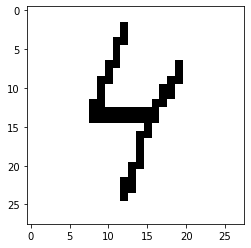

In [85]:
example = image.load_img('4_.png', target_size=(28, 28), color_mode = 'grayscale') 


plt.imshow(example.convert('RGBA')) 
plt.show()

In [86]:
example = image.img_to_array(example)
example = example.reshape(1,784)
example = example.astype('float32')
example = 1- example/255

In [98]:
example.shape

(1, 784)

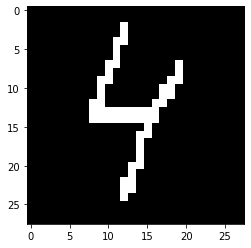

In [106]:
plt.imshow(image.array_to_img(example.reshape(28,28, 1)).convert('RGBA')) 
plt.show()

In [88]:
model = Sequential() 
model.add(Dense(800, input_dim=784, activation="relu"))
# model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
X_vec = np.concatenate((X_train_vec, X_test_vec), axis=0)
y_vec = np.concatenate((y_train_vec, y_test_vec), axis=0)

In [78]:
print(X_vec.shape)
print(y_vec.shape)


(70000, 784)
(70000, 10)


In [79]:
model.fit(X_vec, y_vec, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
547/547 [==============================] - 3s 6ms/step - loss: 0.2252 - accuracy: 0.9358
Epoch 2/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0872 - accuracy: 0.9743
Epoch 3/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0559 - accuracy: 0.9832
Epoch 4/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0382 - accuracy: 0.9886
Epoch 5/15
547/547 [==============================] - 3s 5ms/step - loss: 0.0286 - accuracy: 0.9918
Epoch 6/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0205 - accuracy: 0.9942
Epoch 7/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0147 - accuracy: 0.9959
Epoch 8/15
547/547 [==============================] - 3s 5ms/step - loss: 0.0125 - accuracy: 0.9964
Epoch 9/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0100 - accuracy: 0.9971
Epoch 10/15
547/547 [==============================] - 3s 6ms/step - loss: 0.0079 - accuracy: 0.9978

In [82]:
example_pred = model.predict(example)

In [83]:
pred = np.argmax(example_pred)
print(pred)

4


### Aufgabe 2
(eine auf einem Blatt Papier geschriebene Zahl erkennen)

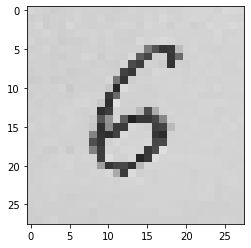

In [133]:
example = image.load_img('6_.png', target_size=(28, 28), color_mode = 'grayscale') 


plt.imshow(example.convert('RGBA')) 
plt.show()

In [134]:
example = image.img_to_array(example)
example = example.reshape(1,784)
print(example)

[[213. 210. 208. 205. 207. 208. 211. 209. 209. 208. 208. 206. 209. 211.
  209. 210. 210. 211. 208. 210. 212. 212. 213. 213. 210. 216. 215. 214.
  206. 209. 205. 209. 207. 209. 212. 208. 208. 211. 206. 208. 210. 209.
  209. 212. 209. 215. 211. 209. 212. 213. 213. 211. 213. 212. 211. 211.
  209. 214. 205. 208. 206. 214. 210. 209. 207. 209. 209. 210. 213. 211.
  207. 214. 211. 212. 207. 212. 212. 207. 210. 215. 212. 213. 217. 214.
  208. 209. 212. 209. 206. 208. 211. 210. 211. 209. 212. 208. 209. 207.
  208. 211. 211. 211. 211. 211. 211. 211. 211. 211. 215. 210. 210. 212.
  211. 207. 208. 209. 204. 206. 206. 208. 211. 208. 211. 208. 207. 207.
  216. 211. 214. 217. 214. 210. 211. 212. 211. 211. 213. 210. 212. 212.
  206. 208. 211. 206. 208. 208. 208. 209. 209. 207. 209. 209. 209. 209.
  208. 122.  83.  55.  59. 188. 211. 213. 210. 210. 209. 211. 211. 211.
  210. 208. 208. 206. 205. 208. 208. 213. 211. 204. 210. 208. 207. 217.
   92.  68. 209. 209.  55. 107. 210. 210. 212. 212. 211. 211. 21

In [135]:
example = np.where(example> 200, 255, example)

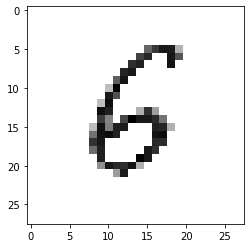

In [136]:
plt.imshow(image.array_to_img(example.reshape(28,28, 1)).convert('RGBA')) 
plt.show()

In [137]:
example = example.astype('float32')
example = 1 - example/255

In [138]:
example_pred = model.predict(example)
pred = np.argmax(example_pred)
print(pred)

9


In [139]:
example_pred

array([[0.10269517, 0.09389957, 0.10594906, 0.09734263, 0.08776778,
        0.07983898, 0.11005578, 0.09556652, 0.10007852, 0.12680598]],
      dtype=float32)